# <center>Support Vector Machine</center>

* **基本概念**

> &emsp;&emsp;<span class="burk"><span class="mark">支持向量机</span></span>（support vector machines，SVM）是一种<span class="mark">二分类</span>模型，它的基本模型是定义在特征空间上的间隔最大的线性分类器。支持向量机还包括核技巧，这使它成为实质上的非线性分类器。其学习策略就是<span class="mark">间隔最大化</span>，可形式化为一个求解<span class="mark">凸二次规划</span>（convex quadratic programming）的问题，也等价于正则化的合页损失函数的最小化问题，支持向量机的学习算法是<span class="burk"><span class="mark">求解凸二次规划的最优化算法</span></span>。

*  **函数间隔 vs 几何间隔**

<img src = "https://pic3.zhimg.com/v2-197913c461c1953c30b804b4a7eddfcc_1200x500.jpg" width="400" align="center"> 

* *函数间隔*
>&emsp;&emsp;在超平面 $ W\cdot x+ b =0 $ 确定的情况下，$| W\cdot x + b|$可以相对地表示点$x$距离超平面的远近。对于两类分类问题，如果$ W\cdot x+ b > 0 $，则的类别$x$被判定为1；否则判定为-1。<br>&emsp;&emsp; 所以如果 $ y(W\cdot x + b) > 0$，则认为 $x$ 的分类结果是正确的，否则是错误的。且 $ y(W\cdot x + b)$的值越大，分类结果的确信度越大.<br>&emsp;&emsp;所以样本点$ (x_i,y_i )$ 与超平面 $( W , b)$ 之间的函数间隔定义为
$$ \gamma_i = y_i(W\cdot x + b)$$
___
* *几何间隔*
>&emsp;&emsp; 函数间隔定义的存在问题是：即$W$和$b$同时缩小或放大M倍后，超平面并没有变化，但是函数间隔却变化了。<br>&emsp;&emsp;所以，函数间隔除以$||W||$，使得函数间隔固定。这时的间隔也就是几何间隔 $$\gamma_i = y_i \cdot \dfrac {(W\cdot x + b)}{|| W ||} $$

* **分类**
    1. Hard-Margin SVM
    2. Soft-Margin SVM
    3. Kernel-SVM

---

1. **Hard-Margin SVM**

输入： 线性可分训练数据集 $$ T = \{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\} \\x_i\in \chi = R^n\\ y_i \in \Gamma = \{+1,-1\} ,i=1,2,3,..,N$$<br>输出：最大间隔分离超平面和分类决策函数

1. 构造并求解约束最优化问题$$ \min \limits_{w,b} \dfrac{1}{2}||w||^2\\ s.t.\quad\  y_i(w\cdot x_i+b)-1 \geq 0, \quad\   i=1,2,3..,N$$

2. 分离超平面 $$w^*\cdot x + b^* = 0$$

3. 分离决策函数 $$f(x)=sign( w^*x + b^*)$$

* **推导过程**

    注：推导式中$||w|| = ||w||_2=w^\mathrm{T} w$，$w$的L2范式，理解就行
    1.  SVM的策略<br>(1)、最小几何间隔最大化<br>(2)、s.t.  每个样本点的几何间隔大于最大函数间隔
        $$
         令 \quad\ \gamma = \min_{i=1,2,...,N} y_i\cdot \dfrac{(w\cdot x_i + b)}{||w||}
        \\
        \max_{w,b}\gamma
        \\ s.t.\quad\ \dfrac{\ y_i(w\cdot x_i + b)}{||w||} \geq \gamma\quad\ i =1,2,...,N
        \\ \Downarrow
        \\  令 \quad\ \hat{\gamma} = \min_{i=1,2,...,N} y_i\cdot (w\cdot x_i + b)
        \\
        \max_{w,b} \dfrac{1}{||w||}\cdot \hat{\gamma}
        \\ s.t.\quad\  y_i(w\cdot x_i + b) \geq \hat{\gamma}  \quad\   i =1,2,...,N
         $$
      由于 w，b成倍的变化不会改变超平面，所以可以令$\hat{\gamma} = 1$
      推出
    $$\min_{w,b} \dfrac{1}{2}||w|| = \min_{w,b} \dfrac{1}{2}w^\mathrm{T}w
    \\ s.t. \quad\ y_i(w\cdot x_i + b) - 1 \geq 0 \quad\   i =1,2,...,N
    $$
    2. 支持向量
    
    <img src="https://tomaszkacmajor.pl/wp-content/uploads/2016/04/soft_margin-OK.gif" width="400" aligen="center">
    
    \&emsp;\&emsp;在线性可分情况下，训练数据集的样本点中与分离超平面跄离最近的样本点的实例称为支持向量( support vector )。
    
    支持向量是使约束条件式等号成立的点（约束条件为KKT条件互补松弛条件），即$$w\cdot x_i + b = +1\\w\cdot x_i + b = -1$$
    3. 优化求解
    
    拉格朗日乘子法，通过求解对偶问题（由于是凸优化问题，满足KKT条件，所以是强对偶关系？）
    
    首先构建拉格朗日函数，对每个不等式约束引进拉格朗日乘子 $\alpha_i \geq 0( i =1,2,...,N)$ ,定义拉格朗日函数：$$L(w,b,\alpha)=\dfrac{1}{2}\cdot w^\mathrm{T} - \sum_{i=1}^N\alpha_iy_i(w\cdot x_i + b)+\sum_{i=1}^N\alpha_i$$
    
    其中，$\alpha = (\alpha_1,\alpha_2,...,\alpha_N)$为拉格朗日乘子向量
    
    KKT条件：
    $$
    \begin{cases}
    \nabla_w = 0\\
    \nabla_b = 0\\
    \nabla_\alpha = 0\\
    \alpha_i [1-y_i(w^\mathrm{T}x_i + b )] = 0\\
    \alpha_i \geq 0\\
    y_i (w^\mathrm{T}x_i + b ) \geq 1\\
    \end{cases}
    $$
    由于$$\min\max L(w,b,\alpha) \geq \max\min L(w,b,\alpha)$$
    原始问题对偶问题：
    $$\max_{\alpha}\min_{w,b}L(w,b,\alpha)$$
    $$\Downarrow$$
    $$\nabla_w L(w,b,\alpha)=0,\quad\ \nabla_b L(w,b,\alpha) = 0$$
    $$\Downarrow$$
    $$w=\sum_{i=1}^N \alpha_i y_i x_i \quad\ \sum_{i=1}^N \alpha_i y_i =0$$
    $$\Downarrow 代入求解$$
    $$\max_{\alpha} \min_{w,b} L(w,b,\alpha)= \max_{\alpha}\{\dfrac{1}{2} w^\mathrm{T}w + \sum_{i=1}^N \alpha_i [1-y_i(w^\mathrm{T}x_i + b)]\} \\
    =\max_{\alpha}\{\sum_{i=1}^N\alpha_i - \frac{1}{2}\sum_{i=1}^N\alpha_i y_i w^\mathrm{T}x_i\}\\
    =\max_{\alpha}\{\sum_{i=1}^N\alpha_i - \frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j ( x_i \cdot x_j)\}\\
    =\min_{\alpha}\{ \frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j ( x_i \cdot x_j) -  \sum_{i=1}^N\alpha_i   \}\\
    s.t. \quad\ \sum_{i=1}^N \alpha_i y_i = 0 , \\ \quad\ \quad\ \alpha_i=0 ,\quad\ i=1,2,...,N\\
  \Downarrow 最优解\\
    \alpha^* = (\alpha^*_1,\alpha^*_2,...,\alpha^*_N)^\mathrm{T}$$
    
    根据$\alpha^*$的最优解以及KKT互补松弛条件
    
    $$\alpha_i [1-y_i(w^\mathrm{T}x_i + b )] = 0 $$
    
    ，当$\alpha$大于0 时(起作用的$(x_i,y_i)$是支持向量！！！)，求解b 代入计算
    
    $$\begin{cases}
    w^*=\sum_{i=1}^N \alpha_i^* y_i x_i\\
    b^*= y_j - \sum_{i=1}^N \alpha_i y_i x_i^\mathrm{T}x_j 
    \end{cases}$$
    
    求得分离超平面 $$w^*\cdot x + b^* = 0$$
    
    分离决策函数 $$f(x)=sign( w^*x + b^*)$$
    

****

2.**Soft-Margin SVM**

输入： 线性可分训练数据集 $$ T = \{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\} \\x_i\in \chi = R^n\\ y_i \in \Gamma = \{+1,-1\} ,i=1,2,3,..,N$$<br>输出：最大间隔分离超平面和分类决策函数
<br>
1. 选择惩罚参数 $C > 0$,构造并求解约束最优化问题$$ \min \limits_{w,b,\xi}\frac{1}{2}w^\mathrm{T}w+ C\sum_{i=1}^{N}\xi_i\\ s.t.\quad\  y_i(w\cdot x_i+b)\geq 1 - \xi_i, \quad\   i=1,2,3..,N\\\xi_i \geq0,\quad\ i=1,2,...,N$$
<br>
最小化目标函数包含两层含义：使$\frac{1}{2}w^\mathrm{T}w$尽量小，即间隔尽量大，同时使误差分类点的个数尽量小，C是调和二者的系数。

2. 分离超平面 $$w^*\cdot x + b^* = 0$$<br>
分离决策函数 $$f(x)=sign( w^*x + b^*)$$
* **优化推理**

拉格朗日函数：$$
L(w,b,\xi,\alpha,\mu)=\frac{1}{2}w^\mathrm{T}w + C\sum_{i=1}^N\xi_i -\sum_{i=1}^N \alpha_i[y_i(w^\mathrm{T}\cdot x_i + b) +\xi_i - 1] - \sum_{i=1}^N\mu_i\xi_i\\
\begin{cases}
\nabla_w = w - sum_{i=1}^N\alpha_i y_i x_i = 0\\
\nabla_b = -\sum_{i=0}^N\alpha_i y_i = 0\\
\nabla_\xi = C - \alpha_i -\mu_i = 0\\
\end{cases}
带入求解：\\
\min_{w,b,\xi} L(w,b,\xi,\mu,\alpha)=-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_j y_i y_j(x_i\cdot x_j) + \sum_{i=1}^N \alpha_i\\
\Downarrow\\
\min_{\alpha} \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_j y_i y_j(x_i\cdot x_j) - \sum_{i=1}^N \alpha_i\\
s.t.\quad\ \sum_{i=1}^N \alpha_i y_i = 0 \quad\ C-\alpha_i - \mu_i =0\quad\ \alpha\geq0,\mu_i\geq0 \quad\ i=1,2,..,N
$$


---

#### <center>Soft_Margin_SVM_Tensorflow<center>

In [1]:
# -*- coding: utf-8 -*-

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Step #10 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [4.393526]

Step #20 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [2.8468368]

Step #30 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [2.2824593]

Step #40 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [1.7195808]

Step #50 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [1.3770787]

Step #60 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [1.270742]

Step #70 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [0.59906375]

Step #80 
Train_Accuracy = 0.6 
Test_Accuracy = 0.6 
Loss = [0.4350605]

Step #90 
Train_Accuracy = 0.6333333 
Test_Accuracy = 0.6333333 
Loss = [0.49004894]

Step #100 
Train_Accuracy = 0.7 
Test_Accuracy = 0.7 
Loss = [0.35893172]

Step #110 
Train_Accuracy = 0.8666667 
Test_Accuracy = 0.8666667 
Loss = [0.4031689]

Step #120 
Train_Accuracy = 1.0 
Test_Accuracy = 1.0 
Loss = [0.36421534]

S

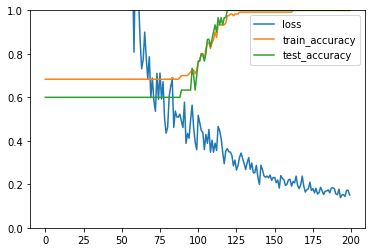

In [2]:
# -*- coding: utf-8 -*-
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from pylab import mpl
from tensorflow.examples.tutorials.mnist import input_data

# 随机种子
np.random.seed(666)
tf.compat.v1.set_random_seed(666)
'''
                                    数据预处理
'''
# iris dataset
iris=datasets.load_iris()
feature_num = 4
x_vals=iris.data # shape(150，4)
y_vals=np.array([1 if y==0 else -1 for y in iris.target]) # shape(150,)

# 划分数据为训练集和测试集 比例 8：2
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]



# 批训练中批的大小

batch_size = 100
x_data = tf.compat.v1.placeholder(shape=[None, feature_num], dtype=tf.float32)
y_target = tf.compat.v1.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random.normal(shape=[feature_num,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))

#定义损失函数

model_output=tf.matmul(x_data,W)+b
l2_norm = tf.reduce_sum(tf.square(W))

#软正则化参数

alpha = tf.constant([0.1])

#定义损失函数
classification_term = tf.reduce_mean(tf.maximum(0.,1.-model_output*y_target))
loss = classification_term+alpha*l2_norm

#输出
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target),tf.float32))
train_step=tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(loss)

#开始训练
loss_vec = []
train_accuracy = []
test_accuracy = []
with tf.compat.v1.Session() as sess:

    sess.run(tf.compat.v1.global_variables_initializer())
   
    for i in range(200):
       
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
    
        rand_y = np.transpose([y_vals_train[rand_index]])

        sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
        train_accuracy.append(train_acc_temp)
        test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
        test_accuracy.append(test_acc_temp)
        if (i+1)%10==0:
            print('Step #' + str(i+1),'\nTrain_Accuracy = '+ str(test_acc_temp),'\nTest_Accuracy = ' + str(test_acc_temp),'\nLoss = '+str(temp_loss))
            print()
        
plt.plot(loss_vec)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.ylim(0.,1.)
plt.legend(['loss','train_accuracy','test_accuracy'])
plt.savefig('svm_iris_classification.png')


In [3]:
# -*- coding: utf-8 -*-
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data

# 随机种子
np.random.seed(13)
tf.compat.v1.set_random_seed(13)
'''
                                    数据预处理
'''
# mnist dataset
mnist = input_data.read_data_sets('MNIST_DATA/',one_hot=True)
feature_num = 784

x_vals_train = mnist.train.images
x_vals_test = mnist.test.images
y_vals_train = np.array([1 if i[0]==1 or i[1]==1 or i[2] == 1 or i[3] == 1 else -1 for i in mnist.train.labels])
y_vals_test = np.array([1 if i[0]==1 or i[1]==1 or i[2] == 1 or i[3] == 1 else -1 for i in mnist.test.labels])


# 批训练中批的大小

batch_size = 500
x_data = tf.compat.v1.placeholder(shape=[None, feature_num], dtype=tf.float32)
y_target = tf.compat.v1.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random.normal(shape=[feature_num,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))

#定义损失函数

model_output=tf.matmul(x_data,W)+b
l2_norm = tf.reduce_sum(tf.square(W))

#软正则化参数

alpha = tf.constant([0.1])

#定义损失函数
classification_term = tf.reduce_mean(tf.maximum(0.,1.-model_output*y_target))
loss = classification_term+alpha*l2_norm

#输出
prediction = tf.sign(model_output)

accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target),tf.float32))
train_step=tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(loss)

#开始训练
loss_vec = []
train_accuracy = []
test_accuracy = []
with tf.compat.v1.Session() as sess:

    sess.run(tf.compat.v1.global_variables_initializer())
    
    for i in range(4000):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
    
        rand_y = np.transpose([y_vals_train[rand_index]])

        sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        
        train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
        
        train_accuracy.append(train_acc_temp)
        
        test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
        
        test_accuracy.append(test_acc_temp)
        
        if (i+1)%100==0:
            print('Step #' + str(i+1),'\nTrain_Accuracy = '+str(train_acc_temp),'\nTest_Accuracy = ' + str(test_acc_temp),'\nLoss = '+str(temp_loss))
            print()
        


Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Step #100 
Train_Accuracy = 0.6294909 
Test_Accuracy = 0.6447 
Loss = [57.31925]

Step #200 
Train_Accuracy = 0.6902364 
Test_Accuracy = 0.6984 
Loss = [38.242645]

Step #300 
Train_Accuracy = 0.73803633 
Test_Accuracy = 0.7447 
Loss = [25.628044]

Step #400 
Train_Accuracy = 0.77065456 
Test_Accuracy = 0.776 
Loss = [17.333036]

Step #500 
Train_Accuracy = 0.79563636 
Test_Accuracy = 0.8011 
Loss = [11.614448]

Step #600 
Train_Accuracy = 0.81545454 
Test_Accuracy = 0.8201 
Loss = [7.808666]

Step #700 
Train_Accuracy = 0.8322 
Test_Accuracy = 0.834 
Loss = [5.421579]

Step #800 
Train_Accuracy = 0.8458545 
Test_Accuracy = 0.8511 
Loss = [3.6997697]

Step #900 
Train_Accuracy = 0.8566727 
Test_Accuracy

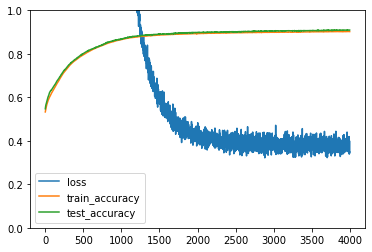

In [4]:
plt.plot(loss_vec)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.ylim(0.,1.)
plt.legend(['loss','train_accuracy','test_accuracy'])
plt.savefig('svm_mnist_classification.png')

3. **Kernel_SVM**

1. **核函数**

\&emsp;\&emsp;设$\chi$是输入空间(欧氏空间 $R^n$的子集或离散集合)，又设 $H$ 为特征空间(希尔伯特空间)，如果存在一个从$\chi$ 到 $H$ 的映射
$$
\phi(x):\chi \rightarrow H\\
使得对所有\\
x,z \in \chi\\
函数K(x,z)满足条件\\
K(x,z)=\phi(x)\cdot\phi(z)\\
$$
则称 K(x,z) 为核函数，$\phi(x)$ 为映射函数， 式中 $\phi(x)\cdot\phi(z)$为 $\phi(x)$ 和 $\phi(z)$ 的内积。

在学习与预测中只定义核函数K(x,z)，而不显式地定义映射函数，通常，直接计算K(x,z)比较容易，而通过$\phi(x)$ 和 $\phi(z)$ 的内积。计算K(x, z)并不容易

目标函数更改为：
$$
W(\alpha) = \frac{1}{2}\sum_{i=i}^N\sum_{j=1}^N\alpha_i \alpha_j y_i y_j K(x_i,x_j) -\sum_{i=1}^N\alpha_i
$$
* **常用核函数(网上down的，学不会，看不懂)**
$$
多项式核函数 \quad\ K(x, z)=(x \cdot z+1)^{p} \\
分类决策函数 \quad\ K(x, z)=\exp \left(-\frac{\|x-z\|^{2}}{2 \sigma^{2}}\right) \\
高斯核函数\quad\ K(x, z)=\exp \left(-\frac{\|x-z\|^{2}}{2 \sigma^{2}}\right) \\
决策函数\quad\ f(x)=\operatorname{sign}\left(\sum_{i=1}^{N_{s}} a_{i}^{*} y_{i} \exp \left(-\frac{\|x-z\|^{2}}{2 \sigma^{2}}\right)+b^{*}\right) \\
字符串核函数\quad\ k_n(s,t)=\sum_{u\in \sum^n}[\phi_n(s)]_u[\phi_n(t)]_u=\sum_{u\in \sum^n}\sum_{(i,j):s(i)=t(j)=u}\lambda^{l(i)}\lambda^{l(j)} \\
$$

输入： 线性可分训练数据集 $$ T = \{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\} \\x_i\in \chi = R^n\\ y_i \in \Gamma = \{+1,-1\} ,i=1,2,3,..,N$$<br>输出：最大间隔分离超平面和分类决策函数
<br>


1.选取适当的核函数K(x,z)和适当的参数C，构造并求解约束最优化问题
$$ 
\min_{\alpha} \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_j y_i y_j K(x_i, x_j) - \sum_{i=1}^N \alpha_i\\\
s.t. \quad\ \sum_{i=1}^N\alpha_i y_i =0 \quad\ 0\leq \alpha_i \leq C,\quad\   i=1,2,3..,N\\
求得最优解\alpha^* = (\alpha^*_1,\alpha^*_2,...,\alpha^*_N)\\
此时\\
b^*=y_j - \sum_{j=}
^N\alpha_i^* y_i K(x_i,x_j)
$$
决策函数$$f(x) = sign(\sum_{i=1}^N\alpha_i^*y_i K(x\cdot x_i)+b^*)$$

* **SMO算法**

>SMO算法是一种启发式算法，其基本思路是：<br>\&emsp;\&emsp;如果所有变量的解都满足此最优化问题的KKT条件(Karush-Kuhn-Tucker conditions)，那么这个最优化问题的解就得到了。因为KKT条件是该最优化问题的充分必要条件。否则，选择两个变量，固定其他变量，针对这两个变量构建一个二次规划问题。这个二次规划问题关于这两个变量的解应该更接近原始二次规划问题的解，因为这会使得原始二次规划问题的目标函数值变得更小。重要的是，这时子问题可以通过解析方法求解，这样就可以大大提高整个算法的计算速度。子问题有两个变量，一个是违反KKT条件最严重的那一个，另一个由约束条件自动确定。如此，SMO算法将原问题不断分解为子问题并对子问题求解，进而达到求解原问题的目的。

* *emmm，公式还没推导完，就不贴了....*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data

# 随机种子
np.random.seed(666)
tf.compat.v1.set_random_seed(666)
'''
                                    数据预处理
'''
# mnist dataset
mnist = input_data.read_data_sets('MNIST_DATA/',one_hot=True)
feature_num = 784

x_vals_train = mnist.train.images
x_vals_test = mnist.test.images
y_vals_train = np.array([1 if i[0]==1 or i[1]==1 or i[2] == 1 or i[3] == 1 else -1 for i in mnist.train.labels])
y_vals_test = np.array([1 if i[0]==1 or i[1]==1 or i[2] == 1 or i[3] == 1 else -1 for i in mnist.test.labels])


# 声明批量大小
batch_size = 1000
x_data = tf.placeholder(shape=[None, feature_num], dtype=tf.float32)
# 样本点的数据y为一个1或者-1的数据
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

alpha = tf.Variable(tf.random.normal(shape=[1, batch_size]))

# 创建高斯核函数
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
# 实现了(xi-xj)的平方项
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

# 处理对偶问题
# 损失函数对偶问题的第一项
first_term = tf.reduce_sum(alpha)
alpha_vec_cross = tf.matmul(tf.transpose(alpha), alpha)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
# 损失函数对偶问题的第二项
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(alpha_vec_cross, y_target_cross)))
# 第一项加第二项的负数
loss = tf.negative(tf.subtract(first_term, second_term))

# 预测输出
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), alpha), my_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

# 创建优化器函数
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

# 开始迭代训练
loss_vec = []
train_accuracy = []
test_accuracy = []

with tf.compat.v1.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(1500):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_test = np.random.choice(len(x_vals_test), size=batch_size)
        
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        
        train_acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
        train_accuracy.append(train_acc_temp)

        test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test[rand_test], y_target: np.transpose([y_vals_test[rand_test]])})
        test_accuracy.append(test_acc_temp)

        if (i+1)%100==0:
            print('Step #' + str(i+1),'\nTrain_Accuracy = '+str(train_acc_temp),'\nTest_Accuracy = ' + str(test_acc_temp),'\nLoss = '+str(temp_loss))
            print()


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Step #100 
Train_Accuracy = 0.554 
Test_Accuracy = 0.563 
Loss = 531.21484

Step #200 
Train_Accuracy = 0.614 
Test_Accuracy = 0.619 
Loss = 277.23203

Step #300 
Train_Accuracy = 0.683 
Test_Accuracy = 0.679 
Loss = 102.36496

Step #400 
Train_Accuracy = 0.738 
Test_Accuracy = 0.744 
Loss = -13.0089

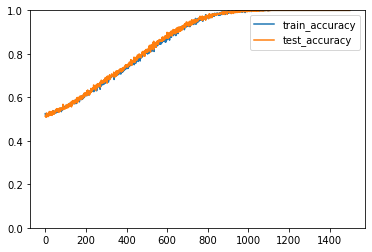

In [2]:
# plt.plot(loss_vec)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.ylim(0.,1.)
plt.legend(['train_accuracy','test_accuracy'])
plt.savefig('rbf_svm_mnist_classification.png')